# Image analysis with Azure Computer Vision

# Import required Libraries

In [1]:
import requests
# If you are using a Jupyter Notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
import json
import sys
import os
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from io import BytesIO

# Setup Key and Endpoint

To use your cognitive services resource, client applications need its endpoint and authentication key:

1. In the Azure portal, on the **Keys and Endpoint** page for your cognitive service resource, copy the **Key1** for your resource and paste it in the code below, replacing **YOUR_COG_KEY**.
2. Copy the **endpoint** for your resource and and paste it in the code below, replacing **YOUR_COG_ENDPOINT**.
3. Run the code below by selecting the cell and then clicking the **Run cell** (&#9655) button to the left of the cell.

In [8]:
# Setup Key and end point
subscription_key = 'YOUR_COG_KEY'
endpoint = 'YOUR_COG_ENDPOINT'

# api url
analyze_url = endpoint + "vision/v3.1/analyze"

## Analyze image features

1. You can use the Computer Vision service to generate a descriptive caption for a couple of images
- Run the following code to analyze an image of a cat.
- Check the result
2. In the code below, change 'visualFeatures': 'Categories,Description,Color' to 'visualFeatures': 'Categories,Description,Color,Objects'
- Run the following code to analyze an image of a cat.
- Check the result

{
    "categories": [
        {
            "name": "animal_cat",
            "score": 0.99609375
        }
    ],
    "color": {
        "dominantColorForeground": "Brown",
        "dominantColorBackground": "Grey",
        "dominantColors": [
            "Grey",
            "Brown",
            "White"
        ],
        "accentColor": "945D37",
        "isBwImg": false,
        "isBWImg": false
    },
    "description": {
        "tags": [
            "cat",
            "indoor",
            "sitting",
            "striped",
            "animal",
            "bed",
            "laying",
            "mammal",
            "domestic cat"
        ],
        "captions": [
            {
                "text": "a cat sitting on a bed",
                "confidence": 0.6210527420043945
            }
        ]
    },
    "requestId": "1c1d9656-1f55-45a5-9b26-9d1c48a2d5e0",
    "metadata": {
        "height": 549,
        "width": 976,
        "format": "Jpeg"
    }
}


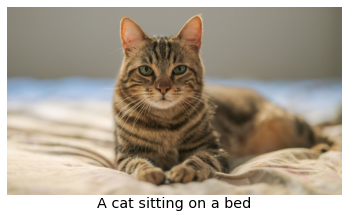

In [34]:
# Set image_url to the URL of an image that you want to analyze.
image_url = "https://c.files.bbci.co.uk/12A9B/production/_111434467_gettyimages-1143489763.jpg"


#send image to azure computer vision api
headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': subscription_key,
}
params = {
    # specifiy what you want to find in the image
    # Try to change 'Categories,Description,Color' to 'Categories,Description,Color,Objects'
    'visualFeatures': 'Categories,Description,Color'
}
data = {'url': image_url}
response = requests.post(analyze_url, headers=headers,
                         params=params, json=data)



# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
print(json.dumps(response.json(), indent=4))

# Make use of the result
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

# Display the image and overlay it with the caption.
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)
plt.show()


# Bounding box
After you changed the visualFeatures to detect objects in the image. You can see the result contain 3 information of the detected objects:

1. The coordinate and width of bounding box
2. Predicted label
3. Confidence value

You can use these information to draw bounding box for the objects.

In [35]:
def draw_bounding_box_on_image(image,
                               obj_arr,
                               color='red',
                               thickness=4,
                               use_normalized_coordinates=True):
    draw = ImageDraw.Draw(image)
    font_size = round(image.width*image.height*0.00006)
    font = ImageFont.truetype('font/Roboto-Regular.ttf', font_size)


    for obj in obj_arr:
        box = obj["rectangle"]
        if 'x' in box:
            xmin = box['x']
        else:
            xmin = 0

        if 'w' in box:
            xmax = xmin+box["w"]
        else:
            xmax = box["w"]

        if 'y' in box:
            ymin = box['y']
        else:
            ymin = 0

        if 'h' in box:
            ymax = ymin+box['h']
        else:
            ymax = 0

        im_width, im_height = image.size
        (left, right, top, bottom) = (xmin, xmax, ymin, ymax)

        draw.line([(left, top), (left, bottom), (right, bottom), (right, top), (left, top)], width=thickness, fill=color)
        draw.text((xmin+10,ymin+10), "Predict: {}\nConfidence: {}".format(obj["object"], obj["confidence"]), fill=(255,0,0), font = font)

draw_bounding_box_on_image(image, analysis['objects'])
plt.imshow(image)
plt.axis("off")
plt.show()

KeyError: 'objects'